# Validación del modelo de regresión

El procedimiento a seguir una vez hemos definido nuestro modelo será validarlo.

La validación se realiza para comprobar que nuestro modelo no presenta un problema de `overfitting`. Es decir, que es capaz de predecir datos de manera fiable cuando le das datos de entrada distintos a los del dataset de entrenamiento.

Existe una técnica de validación que consiste en separar el dataset que tenemos de partida en dos subconjunto, de manera que uno sirva como dataset de entrenamiento y el otro como dataset de validación.

Existen otros métodos que iremos viendo más adelante.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../../../GitHub/python-ml-course/datasets/ads/Advertising.csv")

Lo primero que haremos, pues, es dividir el dataset en dos conjuntos diferentes.

A la hora de hacer la división del dataset, debemos asegurar que hay una consistencia en los datos (tenemos datos de todo tipo) en ambos conjuntos y es homogénea.

Los errores se suelen producir porque el dataset de entrenamiento y de validación proceden de fuentes diferentes.

De momento lo haremos con la regla de la distribución normal con la longitud del dataset y tomar un 80% de los elementos como conjunto de entrenamiento y el resto como conjunto de validación.

In [9]:
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check] # '~' es 'distinto de'
len(training)/len(data) * 100 # Comprobación tonta

82.5

Volvemos a crear el modelo que sabemos que funciona mejor.

In [11]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     689.4
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           5.77e-80
Time:                        16:36:01   Log-Likelihood:                -321.79
No. Observations:                 165   AIC:                             649.6
Df Residuals:                     162   BIC:                             658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7280      0.337      8.101      0.000       2.063       3.393
TV             0.0468      0.002     29.542      0.000       0.044       0.050
Radio          0.1892      0.009     20.939      0.000       0.171       0.207
==============================================================================
Omnibus:                       55.275   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.504
Skew:                          -1.417   Prob(JB):                     8.40e-31
Kurtosis:                       6.481   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si vemos el modelo calculado con todos los datos, los estadísticos y parámetros varían un poco.

El modelo resultante es:

Sales = 2.7280 + 0.0468 TV + 0.1892 Radio

## Validación con el conjunto de testing

Hacemos una predicción con el conjunto de entrenamiento y vemos como se ajusta el resultado al modelo como hemos hecho anteriormente.

In [12]:
sales_pred = lm.predict(testing)
sales_pred.head()

0     20.637608
1     12.244435
13     8.724264
24     8.024681
31    11.298493
dtype: float64

In [13]:
SSD = sum((testing['Sales']-sales_pred)**2)
SSD

81.06810361302291

In [14]:
k = 2 # número de variables predictoras
RSE = np.sqrt(SSD/(len(testing)-k-1))
RSE

1.5916589577880578

In [15]:
sales_mean = np.mean(testing['Sales'])
error = RSE / sales_mean * 100
print("El error en el conjunto de testing es de %.2f%%"%error)

El error en el conjunto de testing es de 11.81%


**Conclusión**

* El modelo generaliza bastante bien en el conjunto de entrenamiento
* El modelo no sufre de `overfitting`

El paso a seguir ahora es documentar el trabajo realizado de tal manera que permita comparar los modelos.

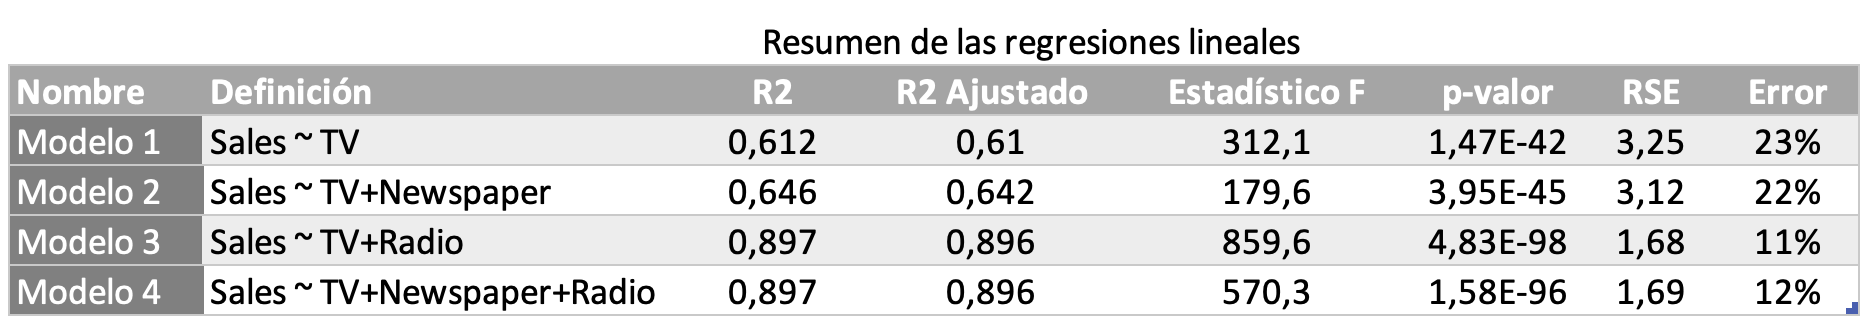

In [20]:
from IPython.display import Image
Image(filename = "resources/summary-lm.png")

**OBSERVACIONES**

* $R^2$ aumenta cuando añadimos variables al modelo. Sin embargo, esto no es sinónimo de que aumente la eficiencia del modelo. El $R^2$ `ajustado` disminuye un poco el valor del $R^2 normal$. Se debe comprobar el primero de estos (con `Radio` se ha disparado)
* El `p-valor`, cuanto menor sea de las variables predictoras, mejor es añadir esa variable al modelo. Al añadir `Radio` al modelo este disminuye considerablemente. Igual ocurre con el `F-estadístico` a la inversa
* `RSE` disminuye cada vez que añadimos una variable predictora buena (en el último aumenta aunque sea poco). Lo mismo ocurre con el `Error`
* El `error` indica el porcentaje de datos que quedan sin explicar de la predicción
* En el caso de que sospechemos que existe una correlación entre variables predictoras, descartamos la variable que presente un mayor `VIF`